In [101]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix , accuracy_score , roc_curve, auc , classification_report
from matplotlib import pyplot as plt

In [109]:
def Image(img : str)->bool:
    if(img.endswith('jpg') or img.endswith('.png') or img.endswith('jpeg')):
        return True
    else:
        return False

def load_images(dataset_path , classes , image_size = (64 , 64)):
    X = []
    Y = []
    print("please Wait for the images to load!!!")
    for class_name in classes:
        class_path = os.path.join(dataset_path , class_name)
        if not os.path.exists(class_path):
            print(f"This path => {class_path} ~~> is Not found")
            continue
        print(f"Loading images from : {class_path}") 
        for file in os.listdir(class_path):
            if not Image(file):
                continue
            img_path = os.path.join(class_path , file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img , image_size)
            X.append(img.flatten())
            if class_name == "Uninfected":
                Y.append(False)
            elif class_name == "Parasitized":
                Y.append(True)
    print("Done")
    return np.array(X) , np.array(Y)

In [110]:
dataset_path = r"C:\Users\DELL\Documents\Project Machine\cell_images"
classes = ["Uninfected","Parasitized"]

if not os.path.exists(dataset_path):
        print(f"this path => {dataset_path} => in Not found")
else:
    X , Y = load_images(dataset_path , classes)

please Wait for the images to load!!!
Loading images from : C:\Users\DELL\Documents\Project Machine\cell_images\Uninfected
Loading images from : C:\Users\DELL\Documents\Project Machine\cell_images\Parasitized
Done


In [91]:
# Best_size = 0
# Best_accuracy_score = 0
# print("Wait for the loop to end")
# for i in range(20, 91):
#     t_s = i / 100
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = t_s, random_state=0)
    
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_train)
#     x_test = scaler.transform(x_test)
    
#     pca = PCA(n_components=100)
#     x_train = pca.fit_transform(x_train)
#     x_test = pca.transform(x_test)

#     Logistic_regression = LogisticRegression(max_iter = 100, solver = "saga")
#     Logistic_regression.fit(x_train, y_train)
    
#     Y_prediction_Logistic_regression = Logistic_regression.predict(x_test)
    
#     acc_score = accuracy_score(y_test, Y_prediction_Logistic_regression)
#     if acc_score > Best_accuracy_score:
#         Best_accuracy_score = acc_score
#         Best_size = t_s
#     print(f"Accuracy At Test size : {t_s} is : {acc_score}")

# print("The Best accuracy is:", Best_accuracy_score, "=> with Test size:", Best_size)

In [104]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("The dimensions of x_test before applying PCA Fit :", x_train.shape)
print("The dimensions of x_test before applying PCA transformation :", x_test.shape)

The dimensions of x_test before applying PCA Fit : (20668, 12288)
The dimensions of x_test before applying PCA transformation : (6890, 12288)


In [93]:
# for n in [50, 100, 200 , 350 , 500 , 700 , 850 , 1000 , 1500]:
#     pca = PCA(n_components=n)
#     x_train_reduced = pca.fit_transform(x_train)
#     x_test_reduced = pca.transform(x_test)

#     Logistic_regression = LogisticRegression(max_iter = 500, solver="saga")
#     Logistic_regression.fit(x_train_reduced, y_train)

#     y_pred = Logistic_regression.predict(x_test_reduced)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"n_components = {n}, Accuracy = {acc}")

In [113]:
pca = PCA(n_components = 500)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [114]:
print("The dimensions of x_test After applying PCA Fit :", x_train.shape)
print("The dimensions of x_test After applying PCA transformation :", x_test.shape)

The dimensions of x_test After applying PCA Fit : (20668, 500)
The dimensions of x_test After applying PCA transformation : (6890, 500)


In [115]:
Logistic_regression = LogisticRegression(max_iter = 500 , solver = "saga")
Logistic_regression.fit(x_train , y_train)

Y_prediction_Logistic_regression = Logistic_regression.predict(x_test)

print("Logistic Regression accuracy is : " , accuracy_score(y_test , Y_prediction_Logistic_regression))

Logistic Regression accuracy is :  0.6892597968069666


In [117]:
report = classification_report(y_test, Y_prediction_Logistic_regression, output_dict = True)
report_DataFrame = pd.DataFrame(report).transpose()
# print(report_DataFrame)

filtered_DataFrame = report_DataFrame.loc[['False', 'True' , 'accuracy'], ['precision', 'recall']]
print(filtered_DataFrame) # => To print precision and racall only

          precision    recall
False      0.675934  0.709193
True       0.703515  0.669908
accuracy   0.689260  0.689260


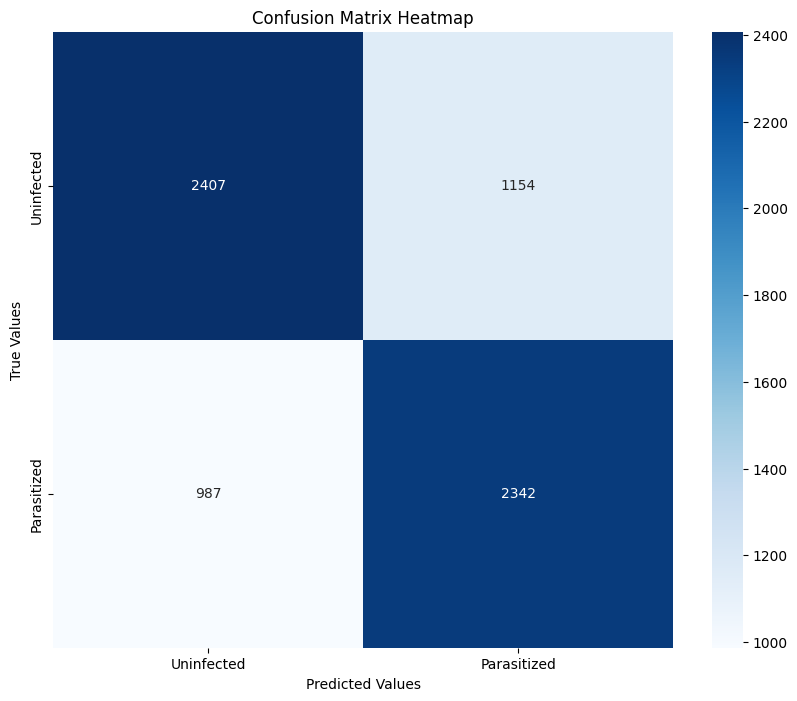

In [119]:
# conf_matrix = confusion_matrix(Y_prediction_Logistic_regression, y_test)
# conf_matrix = confusion_matrix(y_test, Y_prediction_Logistic_regression)
# con_matrix = (Y_prediction_Logistic_regression , y_test)
# confusion_DataFrame = pd.DataFrame( conf_matrix,
#                                     index = ["Actual 0" , "Actual 1"],
#                                     columns = ["prediction 0" , "prediction 1"]
#                                     )
# print(confusion_DataFrame)

import seaborn as sns
conf_matrix = confusion_matrix(Y_prediction_Logistic_regression, y_test)
plt.figure(figsize = (10 , 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Uninfected", "Parasitized"], yticklabels=["Uninfected", "Parasitized"])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix Heatmap')
plt.show()

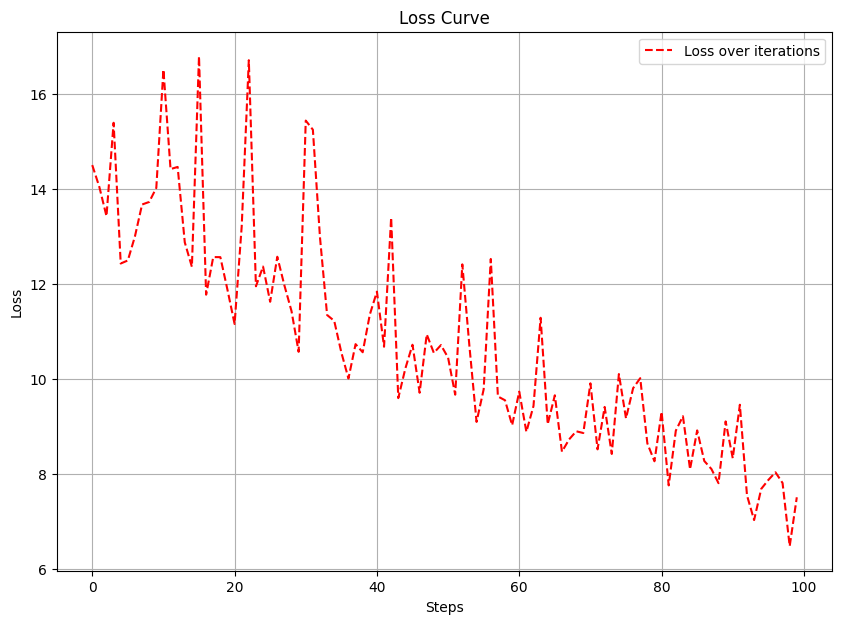

In [108]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

lossValues = []

for i in range(100):
    model.partial_fit(x_train, y_train, classes=np.unique(y_train))
    y_prob = model.predict_proba(x_test)
    current_loss = log_loss(y_test, y_prob)
    lossValues.append(current_loss)

plt.figure(figsize=(10, 7))
plt.plot(lossValues, label='Loss over iterations', color='red', linestyle='--')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

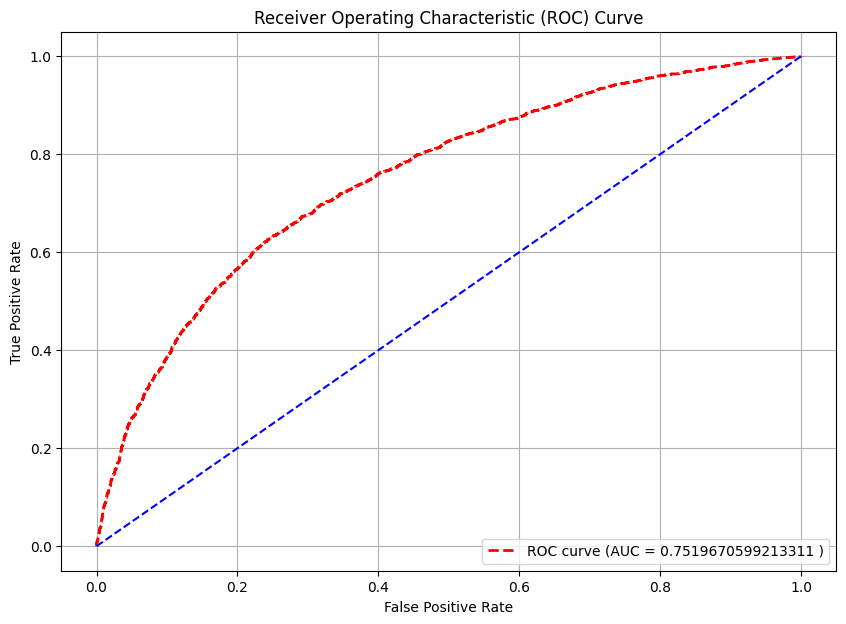

In [99]:
Y_prediction_Logistic_regression = Logistic_regression.predict_proba(x_test)[:, 1]

False_Positive_Rate, True_Positive_Rate, thresholds = roc_curve(y_test, Y_prediction_Logistic_regression)

Roc_auc = auc(False_Positive_Rate , True_Positive_Rate)

plt.figure(figsize=(10, 7))
plt.plot(False_Positive_Rate, True_Positive_Rate, color = 'red', lw = 2, label = f"ROC curve (AUC = {Roc_auc} )" , linestyle = '--')
plt.plot([0, 1], [0, 1], color = 'blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()